In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Постановка задачи
Предоставлены данные о пациентах, больных раков различных органов. Предлагается найти связь между типом рака и продолжительностью жизни.

# Визуализация

In [2]:
cancer = pd.read_csv('cancer.txt', delimiter='\t', encoding='utf8').rename(columns={'Поражённый орган': 'organ', 'Время жизни': 'lifetime'})
cancer.sample(5)

,lifetime,organ
0,124,Печень
60,791,Грудь
49,201,Яичники
38,406,Кишечник
26,223,Лёгкие


In [3]:
len(cancer)

64

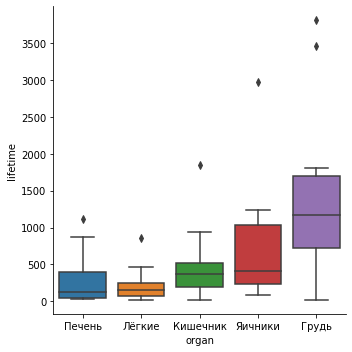

In [4]:
sns.catplot(x='organ', y='lifetime', kind='box', data=cancer)

Text(0, 0.5, 'p(lifetime)')

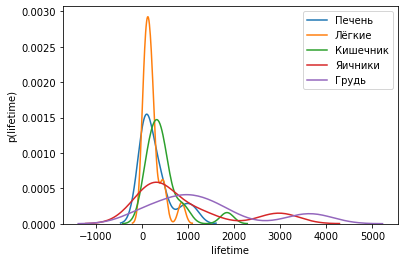

In [5]:
for organ in cancer.organ.unique():
    sns.distplot(cancer.lifetime[cancer.organ == organ], hist=False, label=organ)
plt.legend()
plt.ylabel('p(lifetime)')

# Вариационный анализ

В данной задачи объем данных мал, поэтому использовать параметрические методы, включающий в себя анализ вариации будет неразумно. Вместо этого будем использовать множественное тестирование, для каждой пары органов применяя U критерий Манна — Уитни.

In [6]:
pairs = dict()

organs = cancer.organ.unique()

for i in range(organs.size):
    for j in range(i+1, organs.size):
        o1 = organs[i]
        o2 = organs[j]
        pairs[(o1, o2)] = stats.mannwhitneyu(cancer.lifetime[cancer.organ == o1], cancer.lifetime[cancer.organ == o2]).pvalue
        
res = sm.stats.multipletests([pairs[k] for k in sorted(pairs.keys())], method='hs')[0]
pairs_rej = {
    k: r for k, r in zip(sorted(pairs.keys()), res)
}

print('Accepted')
for (l, r), rej in pairs_rej.items():
    if rej:
        print('{} {} {}'.format(l, '>' if cancer.lifetime[cancer.organ == l].median() > cancer.lifetime[cancer.organ == r].median() else '<', r))

Accepted
Лёгкие < Грудь
Лёгкие < Кишечник


# Выводы

Предложенный тест принял гипотезу, о том, что продолжительность жизни при раке легких не больше, чем при раке груди или кишечника.

P.S. На приведенной диаграмме мы можем наблюдать, что в каждом классе есть объекты похожие на выброс. 
Однако таковыми они скорее всего не являются, тк остаточное распределение жизни весьма вероятно имеет показательное распределение.